In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim import Adam
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize

from models import Generator, Discriminator
from model_utils import train

In [2]:
transform_func = Compose([
    ToTensor(),
    Normalize([0.5], [0.5])
])

In [3]:
train_dataset = CIFAR10('data', train=True, download=True, transform=transform_func)

100%|██████████| 170M/170M [00:04<00:00, 37.9MB/s]


In [4]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [6]:
image, label = train_dataset[0]

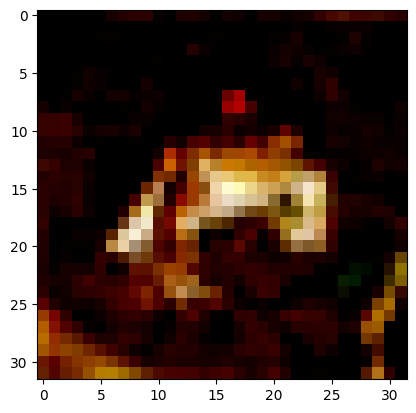

In [7]:
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

In [9]:
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

In [10]:
image.shape

torch.Size([3, 32, 32])

In [11]:
generator = Generator(latent_dim=100, img_shape=(3, 32, 32)).to('cuda')

In [12]:
generator

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): BatchNorm1d(1024, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (9): Linear(in_features=1024, out_features=3072, bias=True)
    (10): Tanh()
  )
)

In [13]:
discriminator = Discriminator(img_shape=(3, 32, 32)).to('cuda')

In [14]:
discriminator

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Dropout(p=0.4, inplace=False)
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): LeakyReLU(negative_slope=0.2)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=512, out_features=1, bias=True)
    (9): Sigmoid()
  )
)

In [15]:
optimizer_g = Adam(generator.parameters(), lr=0.001)

In [16]:
optimizer_d = Adam(generator.parameters(), lr=0.001)

In [17]:
criterion = nn.BCELoss()

Epoch 1/5 | D Loss: 0.6931 | G Loss: 0.6987
Epoch 1/5 | D Loss: 0.7023 | G Loss: 0.6823
Epoch 1/5 | D Loss: 0.7115 | G Loss: 0.6632
Epoch 1/5 | D Loss: 0.7226 | G Loss: 0.6407
Epoch 1/5 | D Loss: 0.7339 | G Loss: 0.6224
Epoch 1/5 | D Loss: 0.7489 | G Loss: 0.5983
Epoch 1/5 | D Loss: 0.7650 | G Loss: 0.5737
Epoch 1/5 | D Loss: 0.7814 | G Loss: 0.5489
Epoch 1/5 | D Loss: 0.7981 | G Loss: 0.5291
Epoch 1/5 | D Loss: 0.8114 | G Loss: 0.5092
Epoch 1/5 | D Loss: 0.8265 | G Loss: 0.4900
Epoch 1/5 | D Loss: 0.8399 | G Loss: 0.4701
Epoch 1/5 | D Loss: 0.8553 | G Loss: 0.4601
Epoch 1/5 | D Loss: 0.8663 | G Loss: 0.4452
Epoch 1/5 | D Loss: 0.8757 | G Loss: 0.4391
Epoch 1/5 | D Loss: 0.8808 | G Loss: 0.4237
Epoch 1/5 | D Loss: 0.8914 | G Loss: 0.4169
Epoch 1/5 | D Loss: 0.9007 | G Loss: 0.4147
Epoch 1/5 | D Loss: 0.9024 | G Loss: 0.4075
Epoch 1/5 | D Loss: 0.9121 | G Loss: 0.3979
Epoch 1/5 | D Loss: 0.9117 | G Loss: 0.3992
Epoch 1/5 | D Loss: 0.9172 | G Loss: 0.3917
Epoch 1/5 | D Loss: 0.9294 | G L

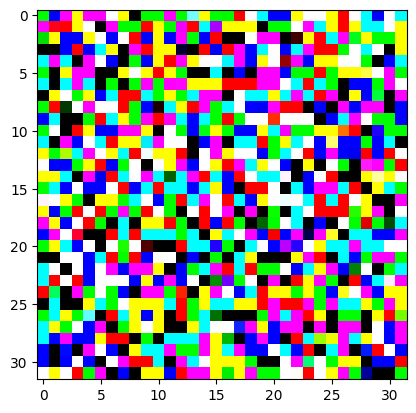

In [18]:
train(generator=generator, discriminator=discriminator,
      data_loader=train_loader,
      optimizer_generator=optimizer_g, optimizer_discriminator=optimizer_d,
      criterion=criterion,
      latent_dim=100, epochs=5)